In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [341]:
data=pd.read_csv('Uber Request Data.csv')
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [317]:
data.Status.unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [318]:
data[data.Status=='No Cars Available'].shape

(2650, 6)

In [319]:
data.Status.shape

(6745,)

In [320]:
#Checking for %age of null values
for i in data.columns:
    print('%age of null Values in',i,'Column:',(data[i].isna().sum()/len(data[i]))*100)

%age of null Values in Request id Column: 0.0
%age of null Values in Pickup point Column: 0.0
%age of null Values in Driver id Column: 39.288361749444036
%age of null Values in Status Column: 0.0
%age of null Values in Request timestamp Column: 0.0
%age of null Values in Drop timestamp Column: 58.028169014084504


In [321]:
data['Status'].isna().sum()

0

In [342]:
#Coverting type to datetime cols to type datatime
data['Request timestamp']=pd.to_datetime(data['Request timestamp'])
data['Drop timestamp']=pd.to_datetime(data['Drop timestamp'])

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [344]:
#Creating new column called request hour filling with hour value from Request timestamp column
data['req_hr']=data['Request timestamp'].dt.hour

In [345]:
#Creating new column called request day filling with day value from Request timestamp column
data['req_day']=data['Request timestamp'].dt.day

In [346]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


<Figure size 432x216 with 0 Axes>

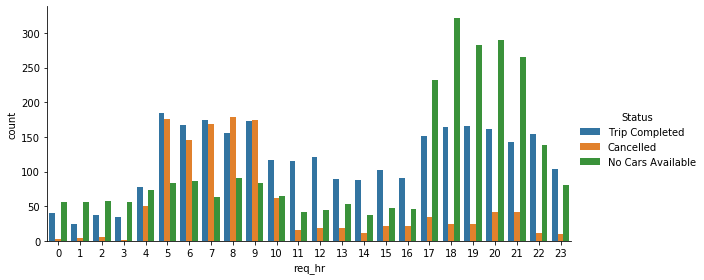

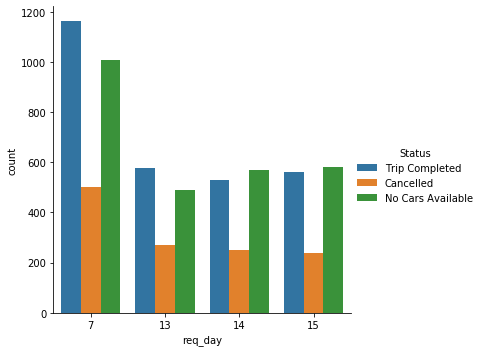

In [197]:
#Count plot
plt.figure(figsize=(6,3))
sns.catplot(x='req_hr',data=data,kind='count',hue='Status',height=4,aspect=2)
plt.show()
sns.catplot(x='req_day',data=data,kind='count',hue='Status')
plt.show()

#From the below plot 1 we can say that in btw 17 to 23 the cars were not available whih made loss to the company
#From the below plot 2 we can say that on everyday out of total requests, for 50 % of the requests the cabs are not
# available whih made loss to the company

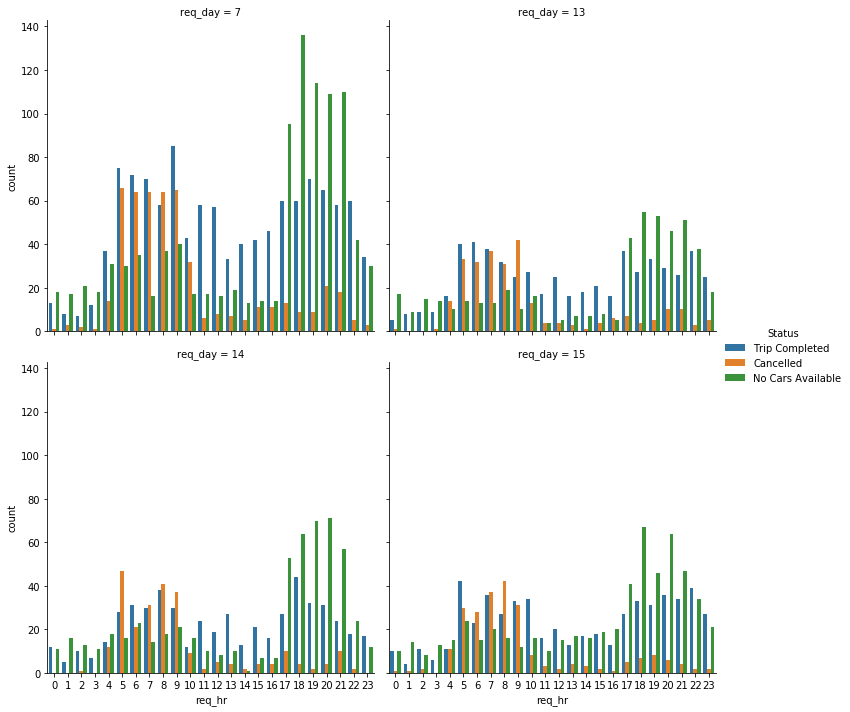

In [198]:
sns.catplot(x='req_hr',data=data,kind='count',hue='Status',col='req_day',col_wrap=2)
plt.show()

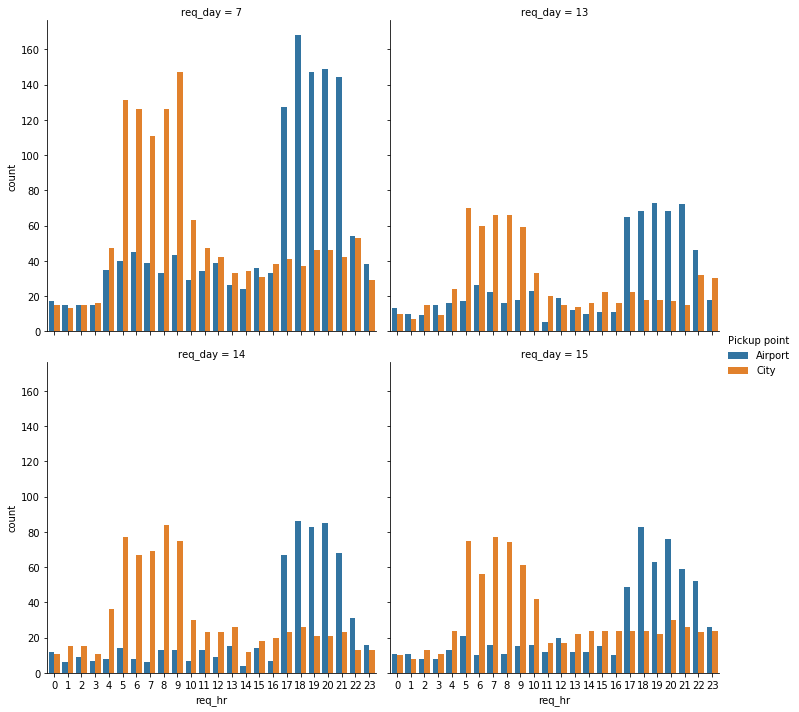

In [199]:
sns.catplot(x='req_hr',data=data,kind='count',hue='Pickup point',col='req_day',col_wrap=2)
plt.show()

#In the morning hours there are more requests from City and at nights there are more requests from Airport.
#So accordingly we can make to have more cabs near the respective places to get rid from cabs shortage.

In [347]:
data['Time_Slot']=0

In [348]:
for i in range(len(data['req_hr'])):
    if [data['req_hr'][i]<=5]==[True]:
        data['Time_Slot'][i]="Pre_Morning"
    elif [5<data['req_hr'][i]<=10]==[True]:
        data['Time_Slot'][i]="Morning_Rush"
    elif [10<data['req_hr'][i]<=17]==[True]:
        data['Time_Slot'][i]="Day_Time"
    elif [17<data['req_hr'][i]<=22]==[True]:
        data['Time_Slot'][i]="Evening_Rush"
    elif [22<data['req_hr'][i]>5]==[True]:
        data['Time_Slot'][i]="Late_Night"

In [350]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Day_Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Day_Time
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush


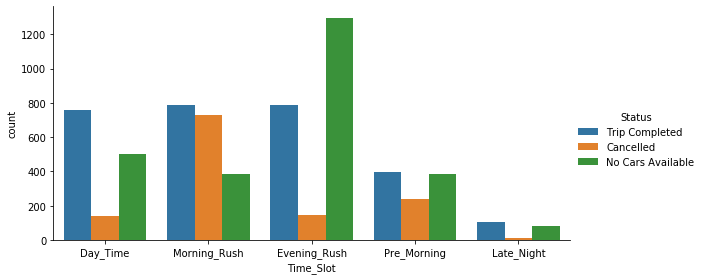

In [352]:
sns.catplot(x='Time_Slot',data=data,kind='count',hue='Status',height=4,aspect=2)
plt.show()

#In the Evening Rush Times there are more shortage of cars
#I Morning Rush time most of the cabs were cancelled

In [355]:
data_Morning_Rush=data[data['Time_Slot']=='Morning_Rush']

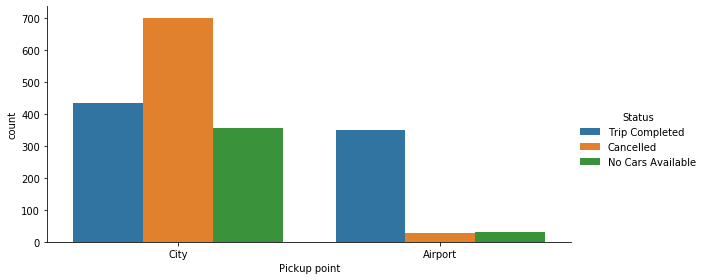

In [358]:
sns.catplot(x='Pickup point',data=data_Morning_Rush,kind='count',hue='Status',height=4,aspect=2)
#Most of the cabs were cancelled when the trips were from City

## Severity of Problem by location and their count (cancellation of cab as per the pick up location at morning rush hours)

## Supply and Demand

In [362]:
print('Total Trip rquests in Morning Rush hrs:',len(data_Morning_Rush))

Total Trip rquests in Morning Rush hrs: 1901


### For Morning Rush from City

In [389]:
print('Total # of trip requests in Mng Rush hours from City:',data_Morning_Rush[data_Morning_Rush['Pickup point']=='City'].shape[0])

Total # of trip requests in Mng Rush hours from City: 1492


In [390]:
print('Total # of completed trips in Mng Rush hours from City:',data_Morning_Rush[(data_Morning_Rush['Pickup point']=='City') & (data_Morning_Rush['Status']=='Trip Completed')].shape[0])

Total # of completed trips in Mng Rush hours from City: 435


In [391]:
print('# of cab cancelled requests in Mng Rush hours from City:',data_Morning_Rush[(data_Morning_Rush['Pickup point']=='City') & (data_Morning_Rush['Status']=='Cancelled')].shape[0])

# of cab cancelled requests in Mng Rush hours from City: 701


In [392]:
print('# of requests for which Cabs were not Available in Mng Rush hours from City:',data_Morning_Rush[(data_Morning_Rush['Pickup point']=='City') & (data_Morning_Rush['Status']=='No Cars Available')].shape[0])

# of requests for which Cabs were not Available in Mng Rush hours from City: 356


### For Morning Rush from Airport

In [393]:
print('Total # of trip requests in Mng Rush hours from Airport:',data_Morning_Rush[data_Morning_Rush['Pickup point']=='Airport'].shape[0])

Total # of trip requests in Mng Rush hours from Airport: 409


In [394]:
print('Total # of completed trips in Mng Rush hours from Airport:',data_Morning_Rush[(data_Morning_Rush['Pickup point']=='Airport') & (data_Morning_Rush['Status']=='Trip Completed')].shape[0])

Total # of completed trips in Mng Rush hours from Airport: 350


In [395]:
print('# of requests for which Cabs were not Available in Mng Rush hours from Airport:',data_Morning_Rush[(data_Morning_Rush['Pickup point']=='Airport') & (data_Morning_Rush['Status']=='No Cars Available')].shape[0])

# of requests for which Cabs were not Available in Mng Rush hours from Airport: 31


In [396]:
print('# of cab cancelled requests in Mng Rush hours from Airport:',data_Morning_Rush[(data_Morning_Rush['Pickup point']=='Airport') & (data_Morning_Rush['Status']=='Cancelled')].shape[0])

# of cab cancelled requests in Mng Rush hours from Airport: 28


### For Evening Rush from City

In [431]:
data_Evening_Rush=data[data['Time_Slot']=='Evening_Rush']
print('Total Trip rquests in Evening Rush hrs:',len(data_Evening_Rush))

Total Trip rquests in Evening Rush hrs: 2228


In [398]:
print('Total # of trip requests in Evening Rush hours from City:',data_Evening_Rush[data_Evening_Rush['Pickup point']=='City'].shape[0])

Total # of trip requests in Evening Rush hours from City: 553


In [399]:
print('Total # of completed trips in Evening Rush hours from City:',data_Evening_Rush[(data_Evening_Rush['Pickup point']=='City') & (data_Evening_Rush['Status']=='Trip Completed')].shape[0])

Total # of completed trips in Evening Rush hours from City: 408


In [400]:
print('# of cab cancelled requests in Evening Rush hours from City:',data_Evening_Rush[(data_Evening_Rush['Pickup point']=='City') & (data_Evening_Rush['Status']=='Cancelled')].shape[0])

# of cab cancelled requests in Evening Rush hours from City: 53


In [401]:
print('# of requests for which Cabs were not Available in Evening Rush hours from City:',data_Evening_Rush[(data_Evening_Rush['Pickup point']=='City') & (data_Evening_Rush['Status']=='No Cars Available')].shape[0])

# of requests for which Cabs were not Available in Evening Rush hours from City: 92


### For Evening Rush from Airport

In [403]:
print('Total # of trip requests in Evening Rush hours from Airport:',data_Evening_Rush[data_Evening_Rush['Pickup point']=='Airport'].shape[0])

Total # of trip requests in Evening Rush hours from Airport: 1675


In [404]:
print('Total # of completed trips in Evening Rush hours from Airport:',data_Evening_Rush[(data_Evening_Rush['Pickup point']=='Airport') & (data_Evening_Rush['Status']=='Trip Completed')].shape[0])

Total # of completed trips in Evening Rush hours from Airport: 379


In [405]:
print('# of cab cancelled requests in Evening Rush hours from Airport:',data_Evening_Rush[(data_Evening_Rush['Pickup point']=='Airport') & (data_Evening_Rush['Status']=='Cancelled')].shape[0])

# of cab cancelled requests in Evening Rush hours from Airport: 90


In [406]:
print('# of requests for which Cabs were not Available in Evening Rush hours from Airport:',data_Evening_Rush[(data_Evening_Rush['Pickup point']=='Airport') & (data_Evening_Rush['Status']=='No Cars Available')].shape[0])

# of requests for which Cabs were not Available in Evening Rush hours from Airport: 1206


In [437]:
#plotting pie charts showing up where there are issues in Supply and Demands
data_Morning_Rush_city=data.loc[(data['Pickup point']=='City')&(data['Time_Slot']=='Morning_Rush')]
data_Morning_Rush_city

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
27,5916,City,3.0,Trip Completed,2016-07-15 10:00:43,2016-07-15 10:53:06,10,15,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6323,5951,City,NaN,No Cars Available,2016-07-15 10:49:35,NaT,10,15,Morning_Rush
6324,5959,City,NaN,No Cars Available,2016-07-15 10:53:00,NaT,10,15,Morning_Rush
6325,5969,City,NaN,No Cars Available,2016-07-15 10:55:41,NaT,10,15,Morning_Rush
6326,5965,City,NaN,No Cars Available,2016-07-15 10:57:44,NaT,10,15,Morning_Rush


In [438]:
data_Morning_Rush_city['Status'].value_counts()

Cancelled            701
Trip Completed       435
No Cars Available    356
Name: Status, dtype: int64

In [440]:
data_Morning_Rush_city_df=pd.DataFrame(data_Morning_Rush_city['Status'].value_counts())
data_Morning_Rush_city_df

,Status
Cancelled,701
Trip Completed,435
No Cars Available,356


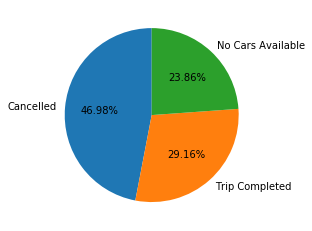

In [454]:
fig,ax=plt.subplots()
ax.pie(data_Morning_Rush_city_df['Status'].values,labels=data_Morning_Rush_city_df['Status'].index,autopct="%.2f%%",startangle=90)
plt.show()

In [455]:
data_Evening_Rush_airport=data.loc[(data['Pickup point']=='Airport')&(data['Time_Slot']=='Evening_Rush')]
data_Evening_Rush_airport

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,Time_Slot
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:13,2016-07-14 23:18:52,22,14,Evening_Rush
19,960,Airport,3.0,Trip Completed,2016-11-07 18:45:00,2016-11-07 19:23:00,18,7,Evening_Rush
22,2211,Airport,3.0,Trip Completed,2016-12-07 18:00:00,2016-12-07 18:28:00,18,7,Evening_Rush
...,...,...,...,...,...,...,...,...,...
6717,6688,Airport,NaN,No Cars Available,2016-07-15 22:37:37,NaT,22,15,Evening_Rush
6718,6689,Airport,NaN,No Cars Available,2016-07-15 22:43:46,NaT,22,15,Evening_Rush
6721,6697,Airport,NaN,No Cars Available,2016-07-15 22:51:18,NaT,22,15,Evening_Rush
6722,6709,Airport,NaN,No Cars Available,2016-07-15 22:56:00,NaT,22,15,Evening_Rush


In [458]:
data_Evening_Rush_airport['Status'].value_counts()

No Cars Available    1206
Trip Completed        379
Cancelled              90
Name: Status, dtype: int64

In [459]:
data_Evening_Rush_airport_df=pd.DataFrame(data_Evening_Rush_airport['Status'].value_counts())
data_Evening_Rush_airport_df

,Status
No Cars Available,1206
Trip Completed,379
Cancelled,90


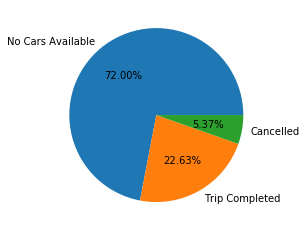

In [460]:
fig,ax=plt.subplots()
ax.pie(data_Evening_Rush_airport_df['Status'].values,labels=data_Evening_Rush_airport_df['Status'].index,autopct="%.2f%%")
plt.show()

Inferences: 

1.They could be given bonus for each trip they complete from the city to the airport in the mornig rush hours. This will ensure that less number of trips wills be cancelled.

2.Uber can pay for the gas mileage for the drivers to come back to the city if incase there is no ride.

3.Drivers can again be given bonus if they complete a trip from the airport in the evening rush hours. This will ensure that the supply increases at the airport.

4.Uber can also pay Drivers to come without a passenger to the airport

5.Another way could be to increase licenses of car pooling taxes so that lesser number of cars can serve more passengers